In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tr = pd.read_csv("input/cmc_train.csv")
ts = pd.read_csv("input/cmc_test.csv")
df = pd.concat([tr, ts], axis=0)
df['contraceptive'] = df['contraceptive'].replace(1, 'no-use')
df['contraceptive'] = df['contraceptive'].replace(2, 'long-term')
df['contraceptive'] = df['contraceptive'].replace(3, 'short-term')

In [3]:
target_cols = ['no-use', 'short-term', 'long-term']

In [4]:
df.columns

Index(['wifes_age', 'wifes_edu', 'husbands_edu', 'n_children', 'wifes_rel',
       'wifes_working', 'husbands_occ', 'sol', 'media', 'contraceptive'],
      dtype='object')

In [39]:
def sample_by_column(data, column, n, ignore_index=False):
    samples = []
    for contraceptive in data[column].unique():
        samples.append(data[data[column] == contraceptive].sample(n=n))
    return pd.concat(samples, ignore_index=ignore_index)

In [42]:
df = sample_by_column(df, 'contraceptive', 300)

# Análise Primária

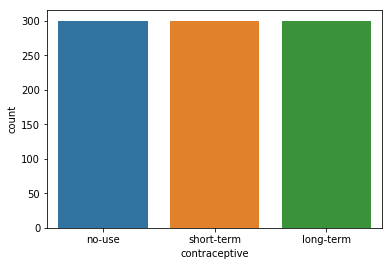

In [43]:
sns.countplot(x='contraceptive', data=df, order=target_cols)

- Quem não tem filhos, tende a não fazer uso de nenhum método contraceptivo
- Quanto mais filhos, maior a chance de fazer o uso de métodos contraceptivos

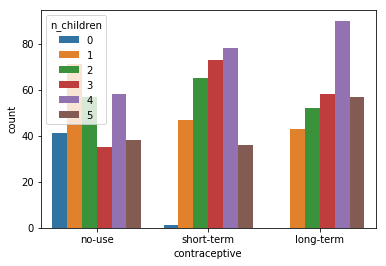

In [45]:
sns.countplot(x='contraceptive', hue='n_children', data=df, order=target_cols)

- Quem tem uma **boa exposição** à mídia é mais propenso a fazer o uso de contraceptivos

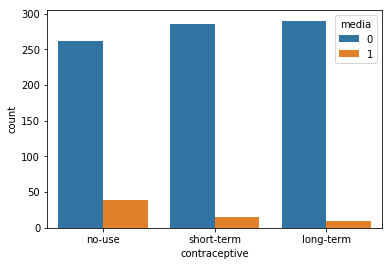

In [47]:
sns.countplot(x='contraceptive', hue='media', data=df, order=target_cols)

- Quanto mais alto o padrão de vida maior as chances de fazer uso de métodos contraceptivos

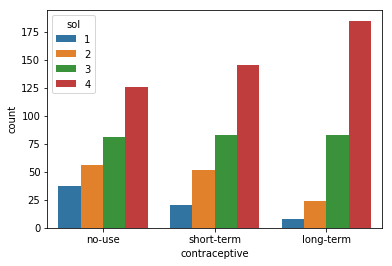

In [49]:
sns.countplot(x='contraceptive', hue='sol', data=df, order=target_cols)

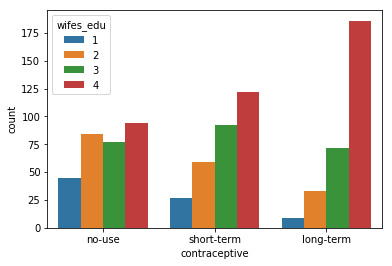

In [51]:
sns.countplot(x='contraceptive', hue='wifes_edu', data=df, order=target_cols)

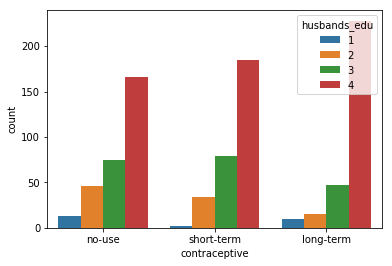

In [53]:
sns.countplot(x='contraceptive', hue='husbands_edu', data=df, order=target_cols)

- Quanto maior o nível de educação dos pais, maior a chance de utilizar métodos contraceptivos

In [54]:
df['parents_edu'] = df['husbands_edu'] + df['wifes_edu']

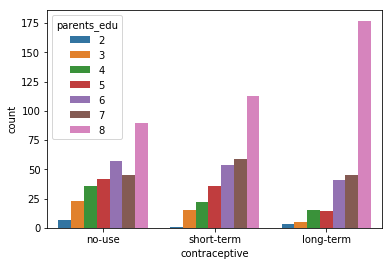

In [55]:
sns.countplot(x='contraceptive', hue='parents_edu', data=df, order=target_cols)

- Quanto maior a idade, maior a tendencia de usar contraceptivos de longo prazo

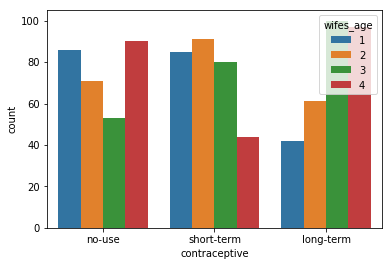

In [56]:
sns.countplot(x='contraceptive', hue='wifes_age', data=df, order=target_cols)

- Mães da religião islã usam mais contraceptivos que não islã
- Mães não-islã tendem a preferir contraceptivos de longo prazo

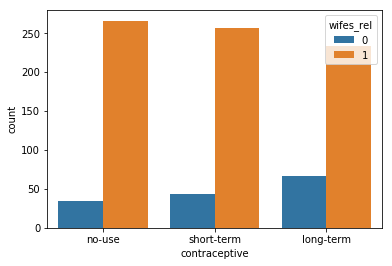

In [60]:
sns.countplot(x='contraceptive', hue='wifes_rel', data=df, order=target_cols)

- Mulheres que **não trabalham** são mais propensas a utilizar contraceptivos 

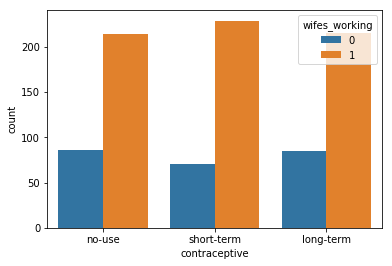

In [64]:
sns.countplot(x='contraceptive', hue='wifes_working', data=df, order=target_cols)

- Algumas ocupações influenciam no uso de contraceptivos

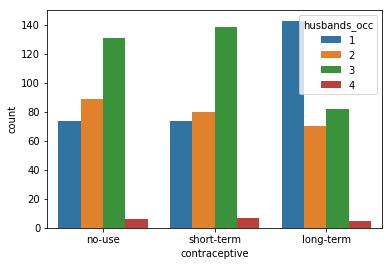

In [63]:
sns.countplot(x='contraceptive', hue='husbands_occ', data=df, order=target_cols)

# Análise secundária

- Quanto mais idade a mãe tem, maior o nível de educação

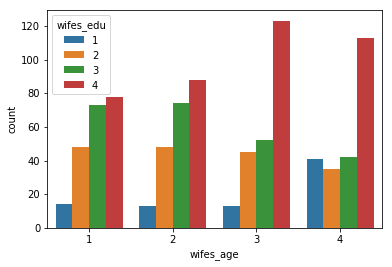

In [67]:
sns.countplot(x='wifes_age', hue='wifes_edu', data=df)

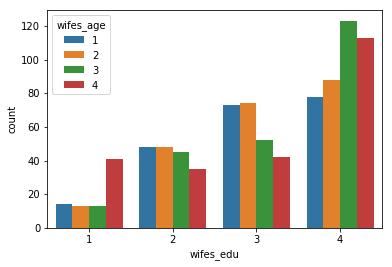

In [68]:
sns.countplot(x='wifes_edu', hue='wifes_age', data=df)

- Não há relação entre religião e estar trabalhando ou não

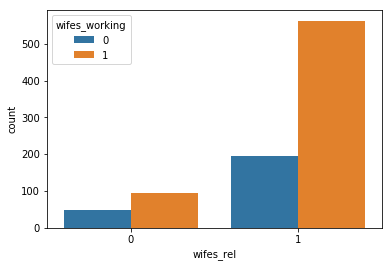

In [72]:
sns.countplot(x='wifes_rel', hue='wifes_working', data=df)

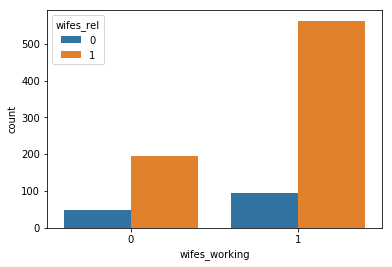

In [71]:
sns.countplot(x='wifes_working', hue='wifes_rel', data=df)

- Quanto mais idade a mãe tem, maior as chances de terem mais filhos

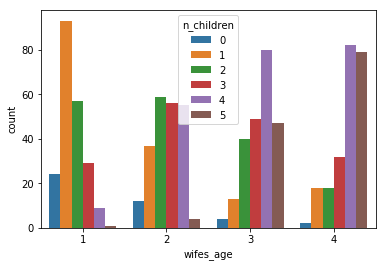

In [87]:
sns.countplot(x='wifes_age', hue='n_children', data=df)

- Mães islãs tem mais filhos que mães não-islãs

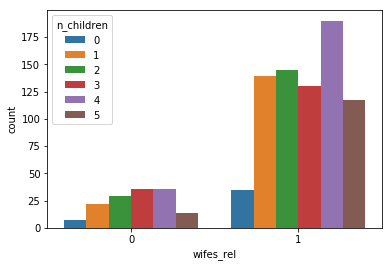

In [88]:
sns.countplot(x='wifes_rel', hue='n_children', data=df)

- Mães que não trabalham tendem a ter mais filhos

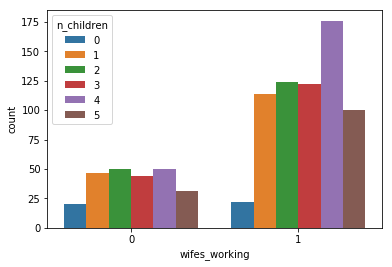

In [90]:
sns.countplot(x='wifes_working', hue='n_children', data=df)

- Mulheres que trabalham, tem menos filhos
- Mulheres mais velhas tendem a ter mais filhos

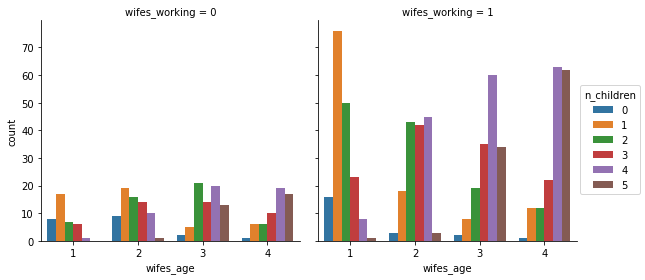

In [97]:
sns.factorplot(x='wifes_age', hue='n_children', col='wifes_working', kind='count', data=df)

- Quanto mais velhas, menor as chances das mulheres serem da religião islã

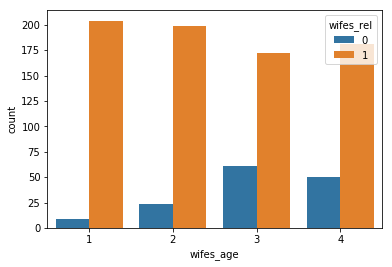

In [99]:
sns.countplot(x='wifes_age', hue='wifes_rel', data=df)

- 

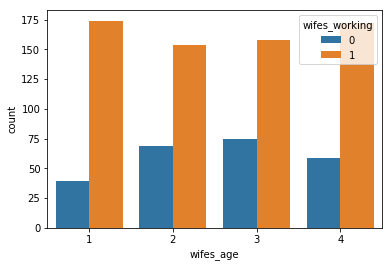

In [101]:
sns.countplot(x='wifes_age', hue='wifes_working', data=df)

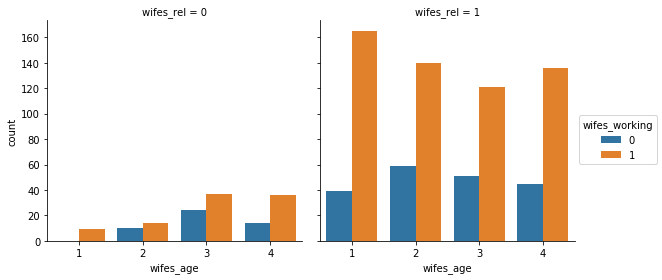

In [103]:
sns.factorplot(x='wifes_age', hue='wifes_working', col='wifes_rel', kind='count', data=df)

- Alguns trabalhos tem uma maior concentração de nivel educacional

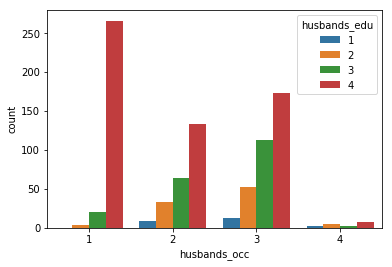

In [77]:
sns.countplot(x='husbands_occ', hue='husbands_edu', data=df)

In [85]:
def mean(x):
    return np.mean(x)
def std(x):
    return np.std(x)

df.groupby('husbands_occ')['husbands_edu'].agg([mean, std])

,mean,std
husbands_occ,,
1,3.900344,0.342369
2,3.343096,0.852920
3,3.267045,0.847620
4,2.777778,1.133115


- Quanto maior o nível de educaçao dos pais, mais alto o padrão de vida

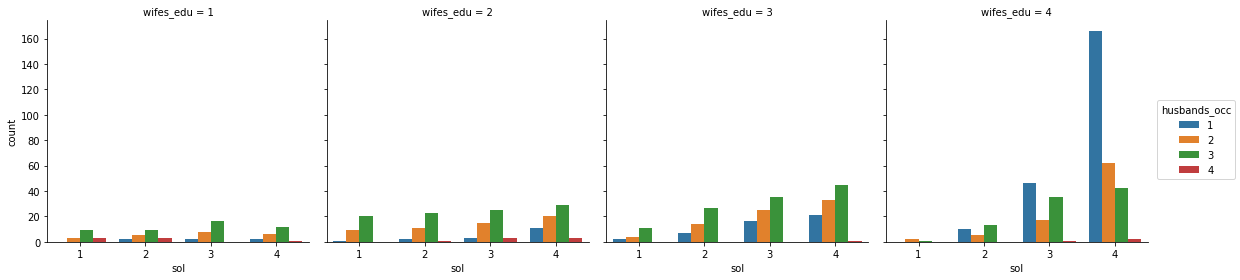

In [106]:
sns.factorplot(x='sol', hue='husbands_occ', col='wifes_edu', kind='count', data=df)

- O padrão de vida influencia no número de filhos 

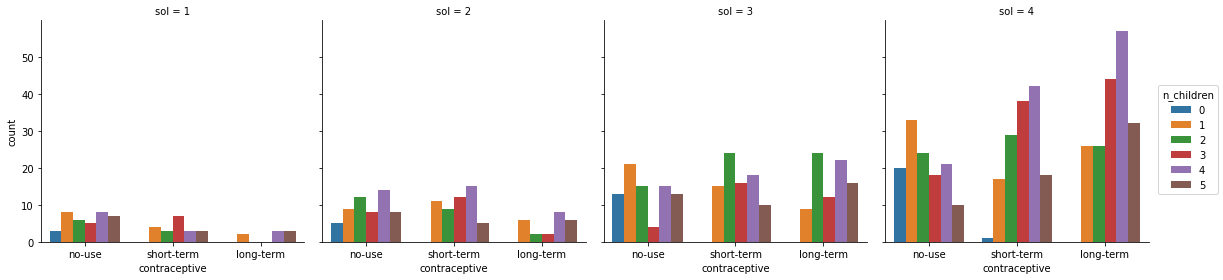

In [109]:
sns.factorplot(x='contraceptive', hue='n_children', col='sol', kind='count', data=df, order=target_cols)

- A mãe trabalhar e a idade da mãe, são fatores muito influentes no número de filhos

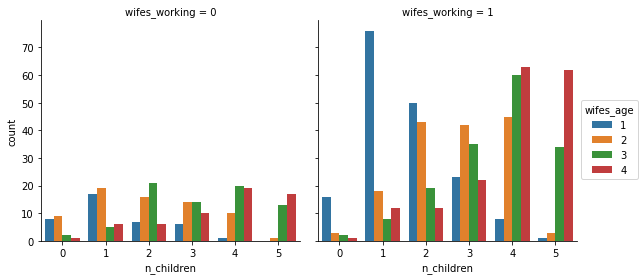

In [111]:
sns.factorplot(x='n_children', hue='wifes_age', col='wifes_working', kind='count', data=df)

- Quanto maior a educação da mãe, maior sua exposição à mídia

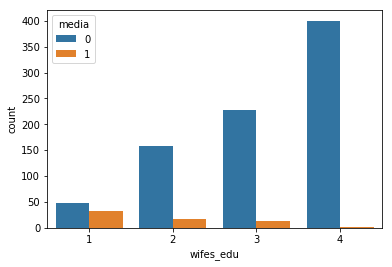

In [117]:
sns.countplot(x='wifes_edu', hue='media', data=df)

# Decision Tree

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [120]:
X, y = tr.drop(['contraceptive'], axis=1), tr['contraceptive']
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

X, y = ts.drop(['contraceptive'], axis=1), ts['contraceptive']
accuracy_score(y, model.predict(X))

0.62

In [121]:
from sklearn.tree import export_graphviz

In [122]:
export_graphviz(model, feature_names=tr.columns[:-1], filled=True, leaves_parallel=True)

/home/eug/.local/lib/python3.5/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


# Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
X, y = tr.drop(['contraceptive'], axis=1), tr['contraceptive']
model = GaussianNB()
model.fit(X, y)

X, y = ts.drop(['contraceptive'], axis=1), ts['contraceptive']
accuracy_score(y, model.predict(X))

0.6